## Getting input data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns


trainingLink = "https://raw.githubusercontent.com/LuisM78/Occupancy-detection-data/master/datatraining.txt"
dataTest1Link = "https://raw.githubusercontent.com/LuisM78/Occupancy-detection-data/master/datatest.txt"
dataTest2Link = "https://raw.githubusercontent.com/LuisM78/Occupancy-detection-data/master/datatest2.txt"

# ---- Variables: ----
# tr = training set
# ts1 = test set 1
# ts2 = test set 2
# trainX = training set input values
# trainy = training set target values
# test1X = test set 1 input values
# test1y = test set 1 target values
# test2X = test set 2 input values
# test2y = test set 2 target values


# getting training set
tr = pd.read_csv(trainingLink, sep=",", skiprows=1, header=None)
tr.columns = ["Id","date","Temperature","Humidity","Light","CO2","HumidityRatio","Occupancy"]
tr = tr.drop(columns=['Id'])
# convert date string to datetime
tr['date'] =  pd.to_datetime(tr['date'], format='%Y-%m-%d %H:%M:%S')
# split day and time and drop date column
dates, times = zip(*[(d.date(), d.time()) for d in tr['date']])
tr.insert(0, 'Day', dates)
tr.insert(1, 'Time', times)
tr = tr.drop(columns=['date'])
# splitting training set
target = tr[tr.columns[-1:]]
target.columns = ["Occupancy"]
trainX = tr[tr.columns[:-1]]
trainy = target


# getting test set 1
ts1 = pd.read_csv(dataTest1Link, sep=",", skiprows=1, header=None)
ts1.columns = ["Id","date","Temperature","Humidity","Light","CO2","HumidityRatio","Occupancy"]
ts1 = ts1.drop(columns=['Id'])
# convert date string to datetime
ts1['date'] =  pd.to_datetime(ts1['date'], format='%Y-%m-%d %H:%M:%S')
# split day and time and drop date column
dates, times = zip(*[(d.date(), d.time()) for d in ts1['date']])
ts1.insert(0, 'Day', dates)
ts1.insert(1, 'Time', times)
ts1 = ts1.drop(columns=['date'])
# splitting training set
target = ts1[ts1.columns[-1:]]
target.columns = ["Occupancy"]
test1X = ts1[ts1.columns[:-1]]
test1y = target


# getting test set 2
ts2 = pd.read_csv(dataTest2Link, sep=",", skiprows=1, header=None)
ts2.columns = ["Id","date","Temperature","Humidity","Light","CO2","HumidityRatio","Occupancy"]
ts2 = ts2.drop(columns=['Id'])
# convert date string to datetime
ts2['date'] =  pd.to_datetime(ts2['date'], format='%Y-%m-%d %H:%M:%S')
# split day and time and drop date column
dates, times = zip(*[(d.date(), d.time()) for d in ts2['date']])
ts2.insert(0, 'Day', dates)
ts2.insert(1, 'Time', times)
ts2 = ts2.drop(columns=['date'])
# splitting training set
target = ts2[ts2.columns[-1:]]
target.columns = ["Occupancy"]
test2X = ts2[ts2.columns[:-1]]
test2y = target

In [ ]:
# Scaling
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
x = trainX.copy()
x = x.drop(columns=['Day', 'Time', 'Humidity', 'HumidityRatio'])

scaler = RobustScaler()
#scaler = MinMaxScaler() 
scaledX = scaler.fit_transform(x)
print(x)
print(scaledX)

      Temperature  Light         CO2
0           23.18  426.0  721.250000
1           23.15  429.5  714.000000
2           23.15  426.0  713.500000
3           23.15  426.0  708.250000
4           23.10  426.0  704.500000
...           ...    ...         ...
8138        21.05  433.0  787.250000
8139        21.05  433.0  789.500000
8140        21.10  433.0  798.500000
8141        21.10  433.0  820.333333
8142        21.10  447.0  821.000000

[8143 rows x 3 columns]
[[1.65088757 1.66162847 1.33986656]
 [1.63313609 1.67528035 1.30358632]
 [1.63313609 1.66162847 1.30108424]
 ...
 [0.42011834 1.68893223 1.7264387 ]
 [0.42011834 1.68893223 1.83569641]
 [0.42011834 1.74353974 1.83903253]]


## K-Means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Calcolo SSE con k da 2 a 50

sse_list = list()
max_k = 50
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(scaledX)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

In [ ]:
# Inserisco K ed SSE in un DataFrame per fare il grafico con seaborn

k = list(range(2, len(sse_list)+2))
df = pd.DataFrame(list(zip(k, sse_list)), 
               columns =['K', 'SSE']) 

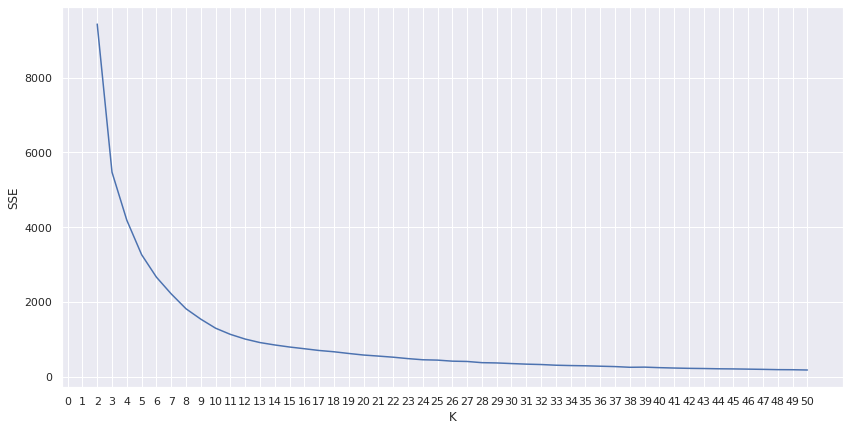

In [ ]:
# Grafico SSE

sns.set(rc={'figure.figsize':(14,7)})
ax = sns.lineplot(x="K", y="SSE", data=df)
ax.set_xticks(range(0,len(sse_list)+2,1))

In [ ]:
sil_list = list()
max_k = 50
for k in range(2, max_k + 1):
    clusterer = KMeans(n_clusters=k, n_init=10, max_iter=100)
    cluster_labels = clusterer.fit_predict(scaledX)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(scaledX, cluster_labels)
    sil_list.append(silhouette_avg)

In [ ]:
k_sil = list(range(2, len(sil_list)+2))
df_sil = pd.DataFrame(list(zip(k_sil, sil_list)), 
               columns =['K', 'Silhouette']) 

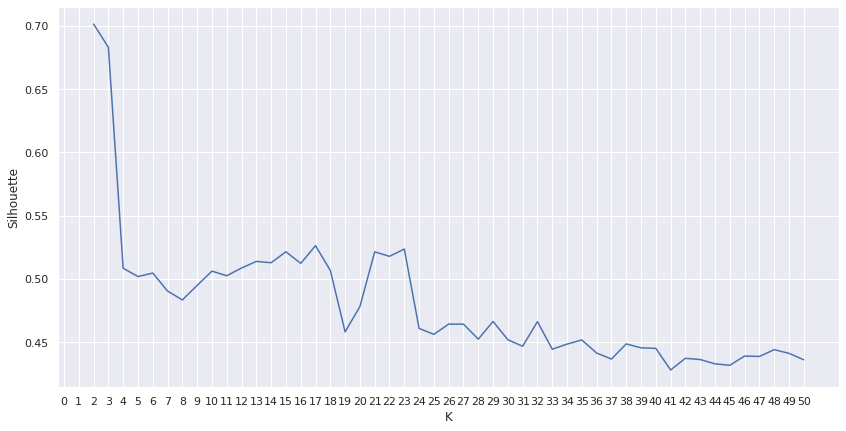

In [ ]:
sns.set(rc={'figure.figsize':(14,7)})
ax = sns.lineplot(x="K", y="Silhouette", data=df_sil)
ax.set_xticks(range(0,len(sil_list)+2,1))

In [ ]:
import random

colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(20)]

K = 10

In [ ]:
# Provo con k = 10

kmeans = KMeans(n_clusters=10, random_state=0).fit(scaledX)

In [ ]:
# Creo una nuova colonna con il numero di cluster per ogni riga
x['Kmeans_cluster'] = kmeans.labels_

In [ ]:
#Analisi clusters composizione
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
sizes = dict(zip(bins, hist))

for id_cluster, size in sizes.items():
    print('Cluster %d: %d (%.2f)' % (id_cluster, size, size/len(x)))

Cluster 0: 470 (0.06)
Cluster 1: 2876 (0.35)
Cluster 2: 200 (0.02)
Cluster 3: 396 (0.05)
Cluster 4: 301 (0.04)
Cluster 5: 215 (0.03)
Cluster 6: 311 (0.04)
Cluster 7: 655 (0.08)
Cluster 8: 2581 (0.32)
Cluster 9: 138 (0.02)


In [ ]:
# SSE e Silhouette

print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(scaledX, kmeans.labels_))

SSE 1298.2186547882675
Silhouette 0.5059783152435496


In [ ]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
print(centers)


[[  22.11812057  474.72702128 1066.53244681]
 [  19.56870555    6.17777585  443.38668289]
 [  22.03338333  394.18666667 1882.5225    ]
 [  21.42776094    6.15467172  699.2543771 ]
 [  20.80250969  444.07126246  587.62369878]
 [  21.40409302  469.55193798 1376.92651163]
 [  22.49203483  252.93547696  450.19474812]
 [  21.75726438  467.81061069  836.7796056 ]
 [  20.65746106   11.90718714  457.51995996]
 [  21.06986111    4.72644928 1212.8428744 ]]


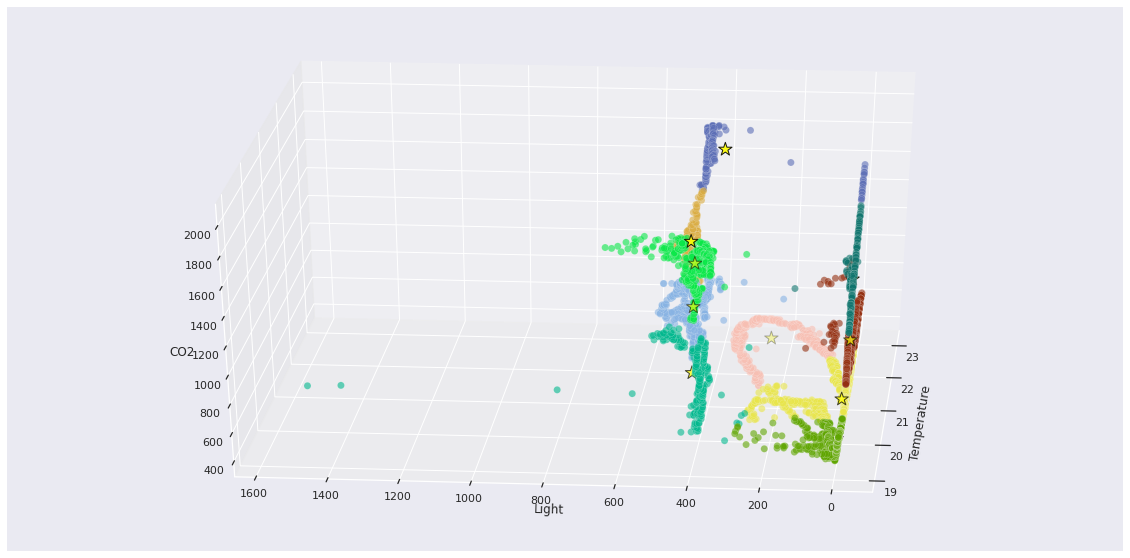

In [ ]:
# plot
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(centers[:,0], centers[:,1], centers[:,2], s=200,marker="*", c='yellow', edgecolors="black")


for i in range(10):
    ax.scatter(x[x['Kmeans_cluster']==i]['Temperature'],x[x['Kmeans_cluster']==i]['Light'],x[x['Kmeans_cluster']==i]['CO2'], color=colors[i],alpha=0.6, s=50, edgecolors="w", linewidth=0.2)

ax.view_init(30, 185)
plt.xlabel('Temperature')
plt.ylabel('Light')
ax.set_zlabel('CO2')
plt.show()

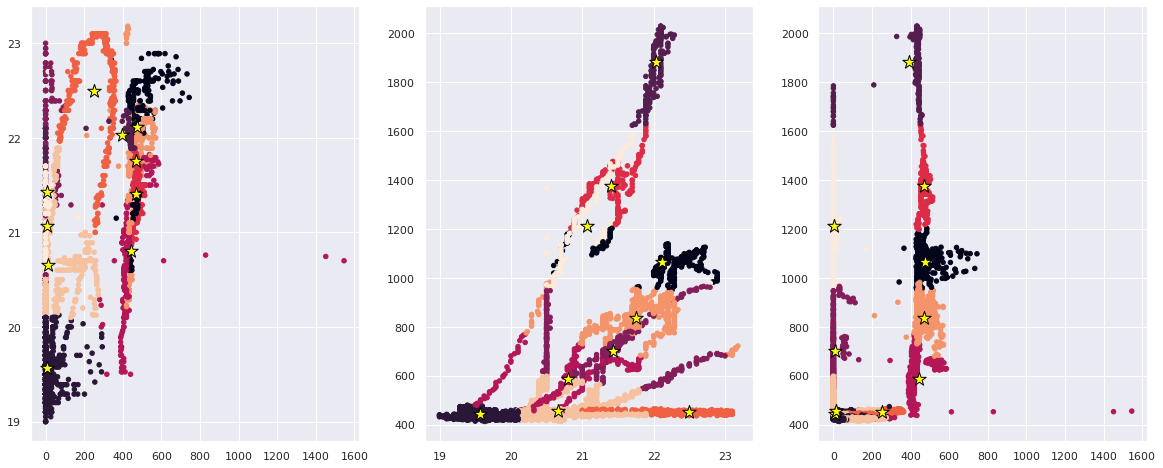

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))
ax1.scatter(x['Light'], x['Temperature'], c=kmeans.labels_, s=20)
ax1.scatter(centers[:,1], centers[:,0], s=200,marker="*", c='yellow', edgecolors="black")

ax2.scatter(x['Temperature'], x['CO2'], c=kmeans.labels_, s=20)
ax2.scatter(centers[:,0], centers[:,2], s=200,marker="*", c='yellow', edgecolors="black")

ax3.scatter(x['Light'], x['CO2'], c=kmeans.labels_, s=20)
ax3.scatter(centers[:,1], centers[:,2], s=200,marker="*", c='yellow', edgecolors="black")

K = 18

In [ ]:
# Provo con k = 18

kmeans = KMeans(n_clusters=18, random_state=0).fit(scaledX)

In [ ]:
# Creo una nuova colonna con il numero di cluster per ogni riga
tr['Kmeans_cluster'] = kmeans.labels_

In [ ]:
#Analisi clusters composizione
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
sizes = dict(zip(bins, hist))

for id_cluster, size in sizes.items():
    print('Cluster %d: %d (%.2f)' % (id_cluster, size, size/len(x)))

Cluster 0: 203 (0.02)
Cluster 1: 1994 (0.24)
Cluster 2: 390 (0.05)
Cluster 3: 41 (0.01)
Cluster 4: 331 (0.04)
Cluster 5: 117 (0.01)
Cluster 6: 154 (0.02)
Cluster 7: 164 (0.02)
Cluster 8: 96 (0.01)
Cluster 9: 265 (0.03)
Cluster 10: 2279 (0.28)
Cluster 11: 251 (0.03)
Cluster 12: 993 (0.12)
Cluster 13: 426 (0.05)
Cluster 14: 169 (0.02)
Cluster 15: 72 (0.01)
Cluster 16: 114 (0.01)
Cluster 17: 84 (0.01)


In [ ]:
# SSE e Silhouette

print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(scaledX, kmeans.labels_))

SSE 651.8257457087493
Silhouette 0.5115265883478081


In [ ]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
print(centers)

[[ 2.05727956e+01  4.29160427e+02  5.54794376e+02]
 [ 2.02379601e+01  2.94068037e+00  4.47822885e+02]
 [ 2.23235556e+01  4.79487692e+02  1.05927427e+03]
 [ 2.16892683e+01 -1.42316714e-14  1.58784959e+03]
 [ 2.15425113e+01  4.72574874e+02  7.45125705e+02]
 [ 2.20915158e+01  4.34456178e+02  1.97294080e+03]
 [ 2.21334740e+01 -8.53900284e-14  5.90106602e+02]
 [ 2.14209197e+01  4.72008130e+02  1.40052358e+03]
 [ 2.11935503e+01  1.17543403e+01  9.31257812e+02]
 [ 2.26353189e+01  2.65464843e+02  4.49872893e+02]
 [ 1.94596057e+01  5.27041831e+00  4.44465891e+02]
 [ 2.09379183e+01  5.54415671e+00  6.75230677e+02]
 [ 2.11120228e+01  5.83423968e+00  4.61731806e+02]
 [ 2.18389609e+01  4.67432825e+02  8.73713048e+02]
 [ 2.05899803e+01  2.04821006e+02  4.38171105e+02]
 [ 2.19640068e+01  4.39526256e+02  1.75530685e+03]
 [ 2.10994006e+01  4.55836257e+02  1.16747734e+03]
 [ 2.10400298e+01  6.77976190e+00  1.21696706e+03]]


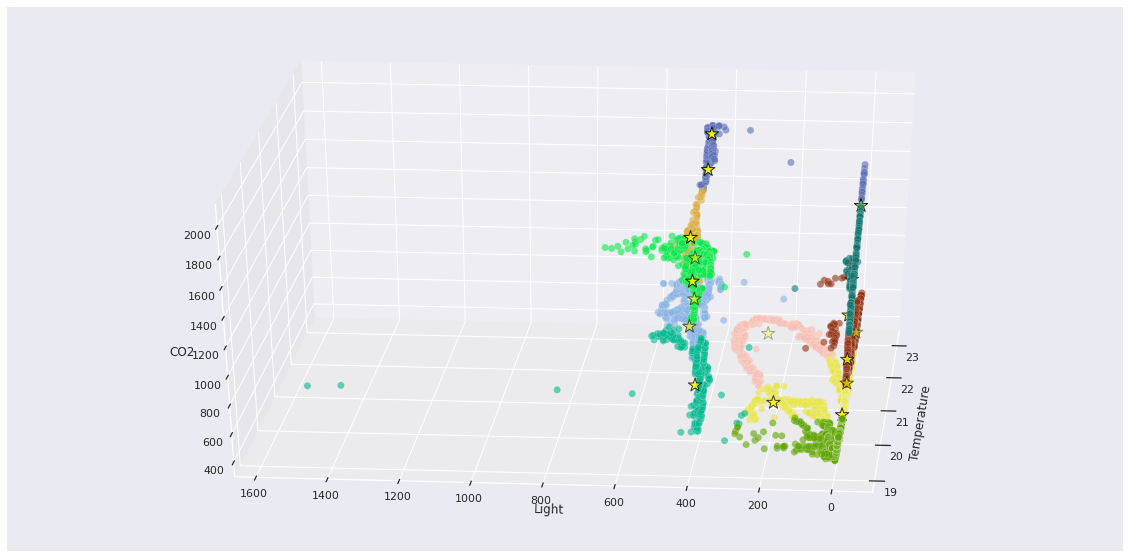

In [ ]:
# plot
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(centers[:,0], centers[:,1], centers[:,2], s=200,marker="*", c='yellow', edgecolors="black")


for i in range(18):
    ax.scatter(x[x['Kmeans_cluster']==i]['Temperature'],x[x['Kmeans_cluster']==i]['Light'],x[x['Kmeans_cluster']==i]['CO2'], color=colors[i],alpha=0.6, s=50, edgecolors="w", linewidth=0.2)

ax.view_init(30, 185)
plt.xlabel('Temperature')
plt.ylabel('Light')
ax.set_zlabel('CO2')
plt.show()

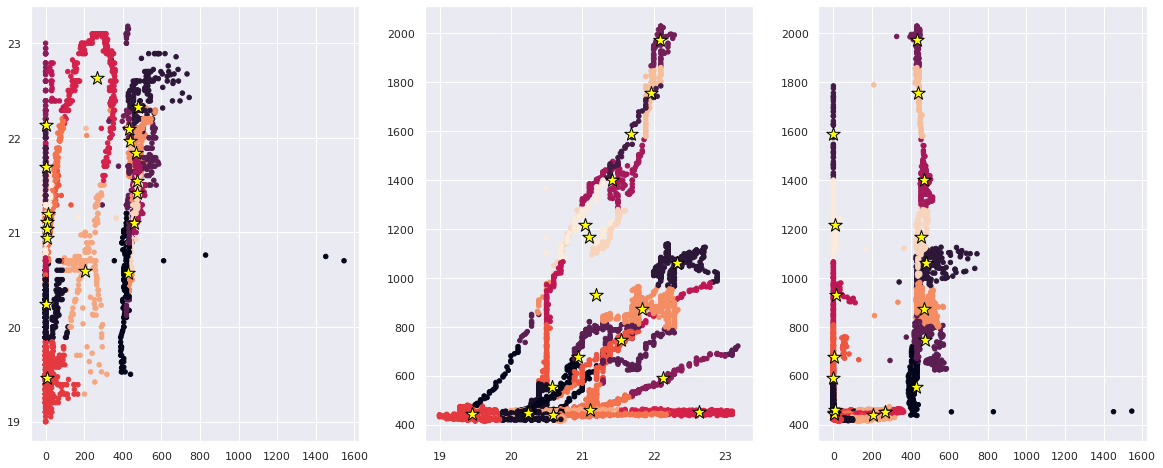

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))
ax1.scatter(x['Light'], x['Temperature'], c=kmeans.labels_, s=20)
ax1.scatter(centers[:,1], centers[:,0], s=200,marker="*", c='yellow', edgecolors="black")

ax2.scatter(x['Temperature'], x['CO2'], c=kmeans.labels_, s=20)
ax2.scatter(centers[:,0], centers[:,2], s=200,marker="*", c='yellow', edgecolors="black")

ax3.scatter(x['Light'], x['CO2'], c=kmeans.labels_, s=20)
ax3.scatter(centers[:,1], centers[:,2], s=200,marker="*", c='yellow', edgecolors="black")

In [ ]:
for i in range(18):
  l = len(tr[tr.Kmeans_cluster==i])
  l_occ = len(tr[(tr.Kmeans_cluster==i) & (tr.Occupancy==1)])
  print("Cluster %d:" %i)
  print("Numero elementi: %d" %l)
  print("Elementi con Occupancy=1: %d  --> %d%%" %(l_occ, (l_occ/l)*100))
  print()

Cluster 0:
Numero elementi: 203
Elementi con Occupancy=1: 184  --> 90%

Cluster 1:
Numero elementi: 1994
Elementi con Occupancy=1: 0  --> 0%

Cluster 2:
Numero elementi: 390
Elementi con Occupancy=1: 366  --> 93%

Cluster 3:
Numero elementi: 41
Elementi con Occupancy=1: 0  --> 0%

Cluster 4:
Numero elementi: 331
Elementi con Occupancy=1: 317  --> 95%

Cluster 5:
Numero elementi: 117
Elementi con Occupancy=1: 117  --> 100%

Cluster 6:
Numero elementi: 154
Elementi con Occupancy=1: 0  --> 0%

Cluster 7:
Numero elementi: 164
Elementi con Occupancy=1: 164  --> 100%

Cluster 8:
Numero elementi: 96
Elementi con Occupancy=1: 0  --> 0%

Cluster 9:
Numero elementi: 265
Elementi con Occupancy=1: 0  --> 0%

Cluster 10:
Numero elementi: 2279
Elementi con Occupancy=1: 0  --> 0%

Cluster 11:
Numero elementi: 251
Elementi con Occupancy=1: 0  --> 0%

Cluster 12:
Numero elementi: 993
Elementi con Occupancy=1: 0  --> 0%

Cluster 13:
Numero elementi: 426
Elementi con Occupancy=1: 393  --> 92%

Cluster 14

## DBSCAN


Parametri:

*   *eps*: Distanza massima tra 2 samples perché siano considerati nello stesso "vicinato";
*   *min_samples*: #samples in un "vicinato" perché un punto sia considerato un core point (include il punto stesso).

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
# Knee Method per stimare il miglior valore di eps

from scipy.spatial.distance import pdist, squareform

In [ ]:
dist = pdist(scaledX, 'euclidean') #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist
print()
print(dist)

[0.04263501 0.04265188 0.06743267 ... 0.10925771 0.12513733 0.05470932]

[[0.         0.04263501 0.04265188 ... 1.29033965 1.32717205 1.33066488]
 [0.04263501 0.         0.01387927 ... 1.28467995 1.32466584 1.32769501]
 [0.04265188 0.01387927 0.         ... 1.28572313 1.32588376 1.3294773 ]
 ...
 [1.29033965 1.28467995 1.28572313 ... 0.         0.10925771 0.12513733]
 [1.32717205 1.32466584 1.32588376 ... 0.10925771 0.         0.05470932]
 [1.33066488 1.32769501 1.3294773  ... 0.12513733 0.05470932 0.        ]]


In [ ]:
k = 9
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

In [ ]:
# Inserisco in un DataFrame per fare il grafico con seaborn

k = list(range(0, len(kth_distances)))
dist_list = sorted(kth_distances)
df = pd.DataFrame(list(zip(k, dist_list)), 
               columns =['Sorted distances', 'Distance from 10th neighbor']) 


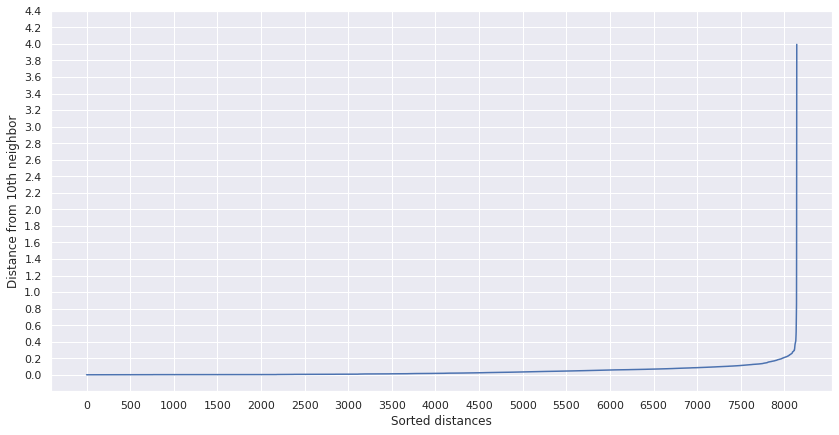

In [ ]:
# Grafico Distanze

sns.set(rc={'figure.figsize':(14,7)})
ax = sns.lineplot(x="Sorted distances", y="Distance from 10th neighbor", data=df)
ax.set_xticks(range(0,len(kth_distances),500))
ax.set_yticks(np.arange(0, max(kth_distances)+0.5, step=0.2))

In [ ]:
dbscan = DBSCAN(eps=0.22, min_samples=9)
dbscan.fit(scaledX)

DBSCAN(algorithm='auto', eps=0.22, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=9, n_jobs=None, p=None)

In [ ]:
print('Silhouette %s' % silhouette_score(scaledX, dbscan.labels_))

Silhouette 0.36614136837769895


In [ ]:
cluster=dbscan.labels_
cluster


array([0, 0, 0, ..., 2, 2, 2])

Text(0, 0.5, 'CO2')

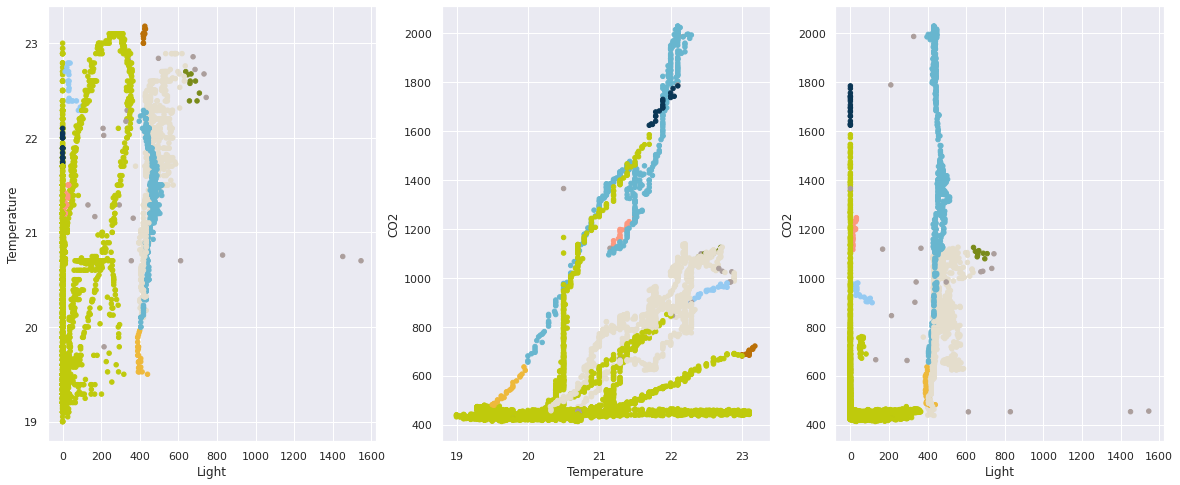

In [ ]:
from random import randint

colors = []

for i in range(-1, 9):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

vectorizer = np.vectorize (lambda x: colors [x% len (colors)])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))
ax1.scatter(x['Light'], x['Temperature'],c=vectorizer(cluster), s=20)
ax1.set_xlabel("Light")
ax1.set_ylabel("Temperature")


ax2.scatter(x['Temperature'], x['CO2'],c=vectorizer(cluster), s=20)
ax2.set_xlabel("Temperature")
ax2.set_ylabel("CO2")


ax3.scatter(x['Light'], x['CO2'], c=vectorizer(cluster), s=20)
ax3.set_xlabel("Light")
ax3.set_ylabel("CO2")


In [ ]:
# Creo una nuova colonna con il numero di cluster per ogni riga
#tr['DBSCAN_cluster'] = dbscan.labels_

tr['DBSCAN_cluster'] = pd.Series(dbscan.labels_, index=tr.index)

In [ ]:
tr.DBSCAN_cluster.unique()

array([ 0,  1, -1,  2,  3,  4,  5,  6,  7,  8])

In [ ]:
for i in range(-1, 9):
  l = len(tr[tr.DBSCAN_cluster==i])
  l_occ = len(tr[(tr.DBSCAN_cluster==i) & (tr.Occupancy==1)])
  print("Cluster %d:" %i)
  print("Numero elementi: %d" %l)
  print("Elementi con Occupancy=1: %d  --> %d%%" %(l_occ, (l_occ/l)*100))
  print()

Cluster -1:
Numero elementi: 21
Elementi con Occupancy=1: 12  --> 57%

Cluster 0:
Numero elementi: 16
Elementi con Occupancy=1: 16  --> 100%

Cluster 1:
Numero elementi: 6256
Elementi con Occupancy=1: 1  --> 0%

Cluster 2:
Numero elementi: 1243
Elementi con Occupancy=1: 1161  --> 93%

Cluster 3:
Numero elementi: 9
Elementi con Occupancy=1: 9  --> 100%

Cluster 4:
Numero elementi: 24
Elementi con Occupancy=1: 0  --> 0%

Cluster 5:
Numero elementi: 25
Elementi con Occupancy=1: 22  --> 88%

Cluster 6:
Numero elementi: 507
Elementi con Occupancy=1: 507  --> 100%

Cluster 7:
Numero elementi: 23
Elementi con Occupancy=1: 1  --> 4%

Cluster 8:
Numero elementi: 19
Elementi con Occupancy=1: 0  --> 0%



## Hierarchical

In [ ]:
import scipy.cluster.hierarchy as sch
import sklearn
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Confronto diversi tipi di distanze e di criteri di collegamento e cerco la silhouette migliore

dist_functions = ["euclidean", "manhattan", "cosine"]
linkage = ["single", "complete", "average"]

for f in dist_functions:
  silhouette_list = []
  for l in linkage:
    clusterer = AgglomerativeClustering(affinity=f, linkage=l)
    clusterer.fit(scaledX)
    
    s = round(sklearn.metrics.silhouette_score(scaledX, clusterer.labels_), 4)
    silhouette_list.append(s)
  key = silhouette_list.index(max(silhouette_list))
  k = linkage.__getitem__(key)
  print("Tipo distanza = ", f, ", Silhouette migliore =", max(silhouette_list), " per linkage =", k)

Tipo distanza =  euclidean , Silhouette migliore = 0.6931  per linkage = average
Tipo distanza =  manhattan , Silhouette migliore = 0.6901  per linkage = complete
Tipo distanza =  cosine , Silhouette migliore = 0.3368  per linkage = average


In [ ]:
# Silhouette con criterio di Ward

clusterer = AgglomerativeClustering(affinity="euclidean", linkage="ward")
clusterer.fit(scaledX)
s = round(sklearn.metrics.silhouette_score(scaledX, clusterer.labels_), 4)

print("Silhouette con ward = ", s)

Silhouette con ward =  0.6993


In [ ]:
# Vario il numero di cluster e cerco quello con silhouette migliore (dist = euclidean, linkage = average)
silhouette_list = []
k_list = range(2, 20)

for p in k_list:
  clusterer = AgglomerativeClustering(n_clusters=p, linkage="average")
  clusterer.fit(scaledX)
  # The higher (up to 1) the better
  s = round(sklearn.metrics.silhouette_score(scaledX, clusterer.labels_), 4)
  silhouette_list.append(s)

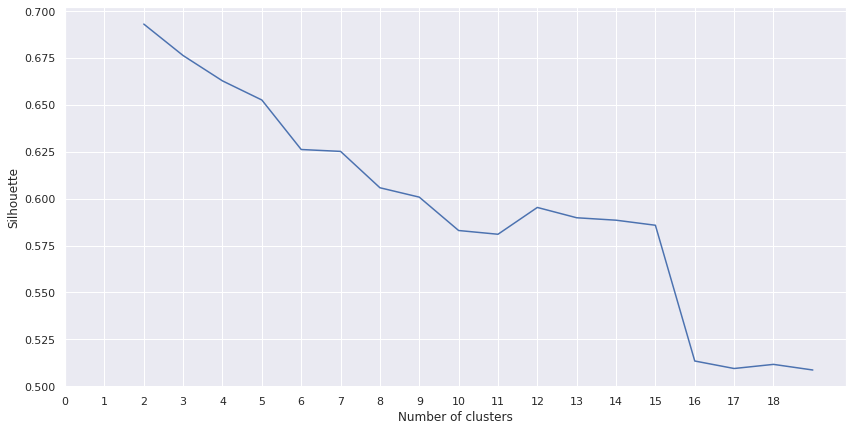

In [ ]:
# Inserisco in un DataFrame le silhouette ottenute per fare il grafico con seaborn

df = pd.DataFrame(list(zip(k_list, silhouette_list)), 
               columns =['Number of clusters', 'Silhouette']) 

# Grafico Silhouette

sns.set(rc={'figure.figsize':(14,7)})
ax = sns.lineplot(x="Number of clusters", y="Silhouette", data=df)
ax.set_xticks(range(0,max(k_list),1))

In [ ]:
# Vario il numero di cluster e cerco quello con silhouette migliore (dist = euclidean, linkage = ward)
silhouette_list = []
k_list = range(2, 20)

for p in k_list:
  clusterer = AgglomerativeClustering(n_clusters=p, linkage="ward")
  clusterer.fit(scaledX)
  # The higher (up to 1) the better
  s = round(sklearn.metrics.silhouette_score(scaledX, clusterer.labels_), 4)
  silhouette_list.append(s)

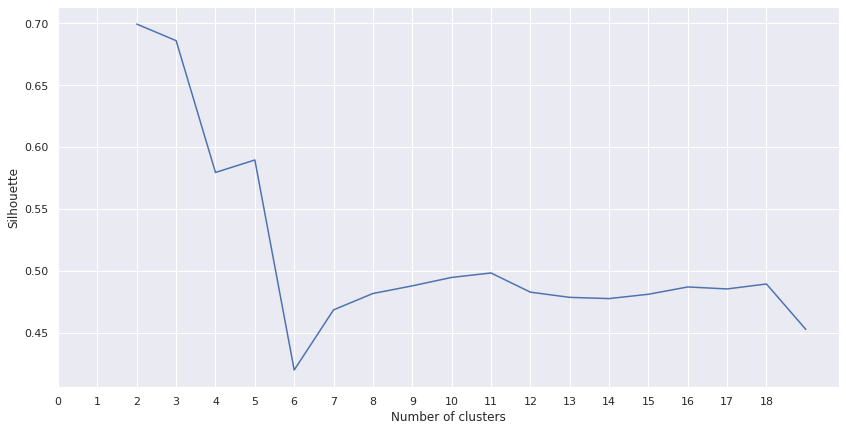

In [ ]:
# Inserisco in un DataFrame le silhouette ottenute per fare il grafico con seaborn

df = pd.DataFrame(list(zip(k_list, silhouette_list)), 
               columns =['Number of clusters', 'Silhouette']) 

# Grafico Silhouette

sns.set(rc={'figure.figsize':(14,7)})
ax = sns.lineplot(x="Number of clusters", y="Silhouette", data=df)
ax.set_xticks(range(0,max(k_list),1))

In [ ]:
# create dendrogram (ward linkage)
ward = sch.linkage(scaledX, method='ward')
# create dendrogram (single linkage)
single = sch.linkage(scaledX, method='single')
# complete linkage
complete = sch.linkage(scaledX, method='complete')
# average linkage
average = sch.linkage(scaledX, method='average')

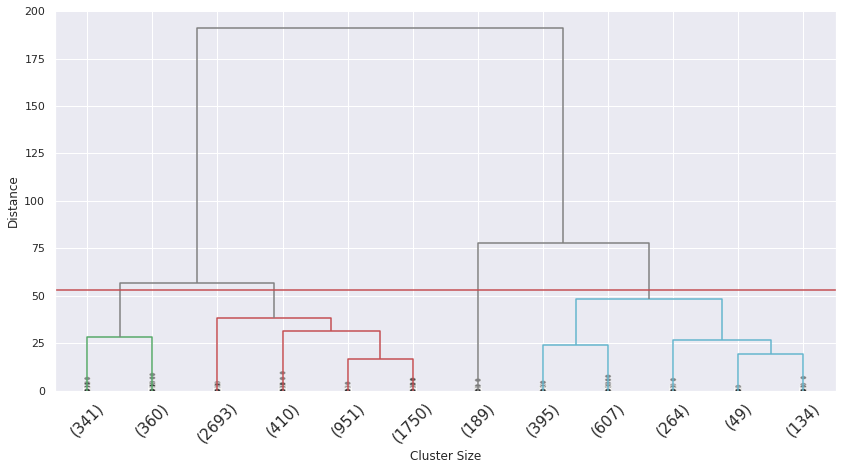

In [ ]:
#generate dendrogram
w1 = sch.dendrogram(ward, truncate_mode= "lastp", p=12, leaf_rotation=45, leaf_font_size=15, show_contracted=True, color_threshold=53, above_threshold_color='grey')
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
#divide the cluster
plt.axhline(y=53, color='r', linestyle='-')
plt.show()

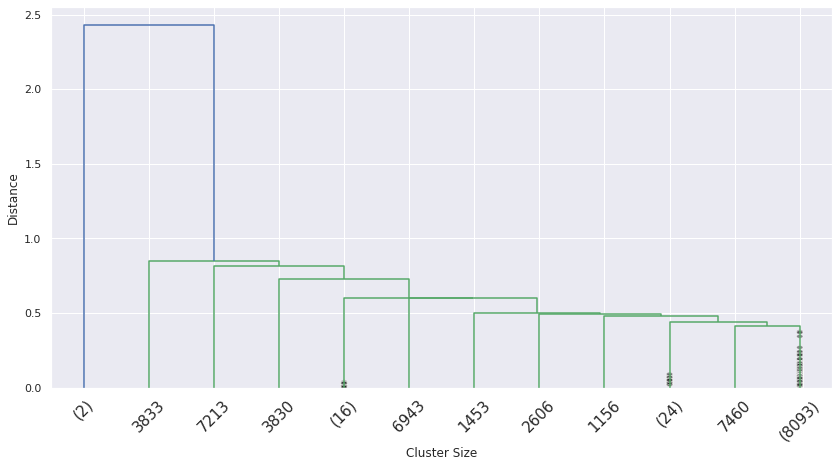

In [ ]:
#generate dendrogram
s1 = sch.dendrogram(single, truncate_mode= "lastp", p=12, leaf_rotation=45, leaf_font_size=15, show_contracted=True)
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
#divide the cluster
#plt.axhline(y=60, color='r', linestyle='-')
plt.show()

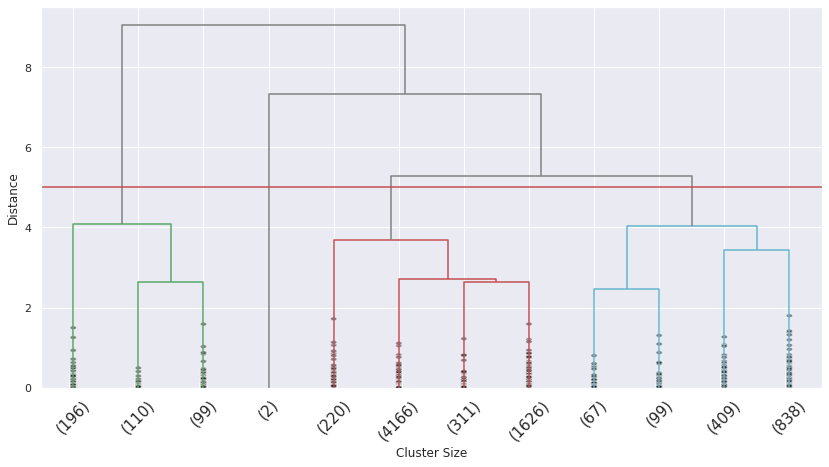

In [ ]:
#generate dendrogram
c1 = sch.dendrogram(complete, truncate_mode= "lastp", p=12, leaf_rotation=45, leaf_font_size=15, show_contracted=True, color_threshold=5, above_threshold_color='grey')
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
#divide the cluster
plt.axhline(y=5, color='r', linestyle='-')
plt.show()

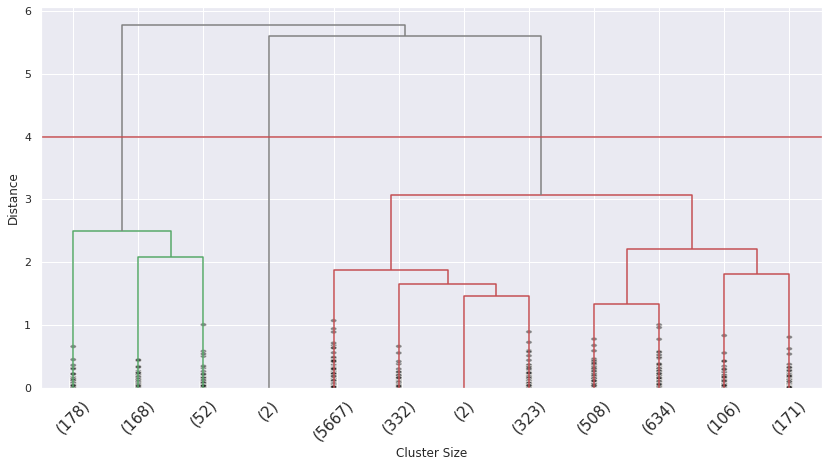

In [ ]:
#generate dendrogram
a1 = sch.dendrogram(average, truncate_mode= "lastp", p=12, leaf_rotation=45, leaf_font_size=15, show_contracted=True, color_threshold=4, above_threshold_color='grey')
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
#divide the cluster
plt.axhline(y=4, color='r', linestyle='-')
plt.show()

In [ ]:
# create clusters

hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
hc.fit_predict(scaledX)

# Creo una nuova colonna con il numero di cluster per ogni riga
tr['Hierarchical_cluster'] = hc.labels_

Text(0, 0.5, 'CO2')

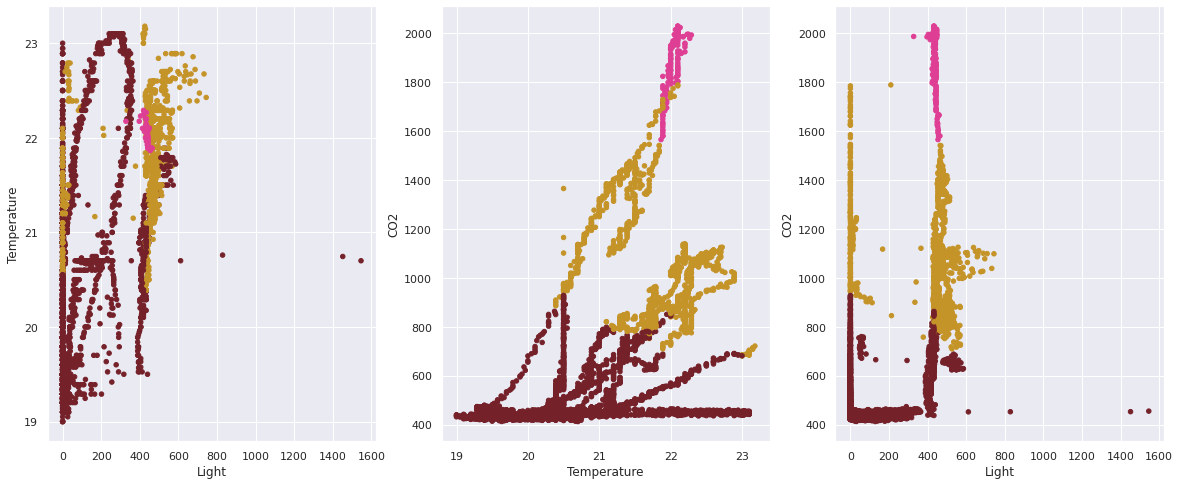

In [ ]:
from random import randint

colors = []

for i in range(3):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
    
vectorizer = np.vectorize (lambda x: colors [x% len (colors)])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))
ax1.scatter(x['Light'], x['Temperature'],c=vectorizer(hc.labels_), s=20)
ax1.set_xlabel("Light")
ax1.set_ylabel("Temperature")


ax2.scatter(x['Temperature'], x['CO2'],c=vectorizer(hc.labels_), s=20)
ax2.set_xlabel("Temperature")
ax2.set_ylabel("CO2")


ax3.scatter(x['Light'], x['CO2'], c=vectorizer(hc.labels_), s=20)
ax3.set_xlabel("Light")
ax3.set_ylabel("CO2")

In [ ]:
for i in range(3):
  l = len(tr[tr.Hierarchical_cluster==i])
  l_occ = len(tr[(tr.Hierarchical_cluster==i) & (tr.Occupancy==1)])
  print("Cluster %d:" %i)
  print("Numero elementi: %d" %l)
  print("Elementi con Occupancy=1: %d  --> %d%%" %(l_occ, (l_occ/l)*100))
  print()

Cluster 0:
Numero elementi: 6505
Elementi con Occupancy=1: 335  --> 5%

Cluster 1:
Numero elementi: 1449
Elementi con Occupancy=1: 1205  --> 83%

Cluster 2:
Numero elementi: 189
Elementi con Occupancy=1: 189  --> 100%



In [ ]:
# create clusters

hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')
hc.fit_predict(scaledX)

# Creo una nuova colonna con il numero di cluster per ogni riga
tr['complete_cluster'] = hc.labels_

Text(0, 0.5, 'CO2')

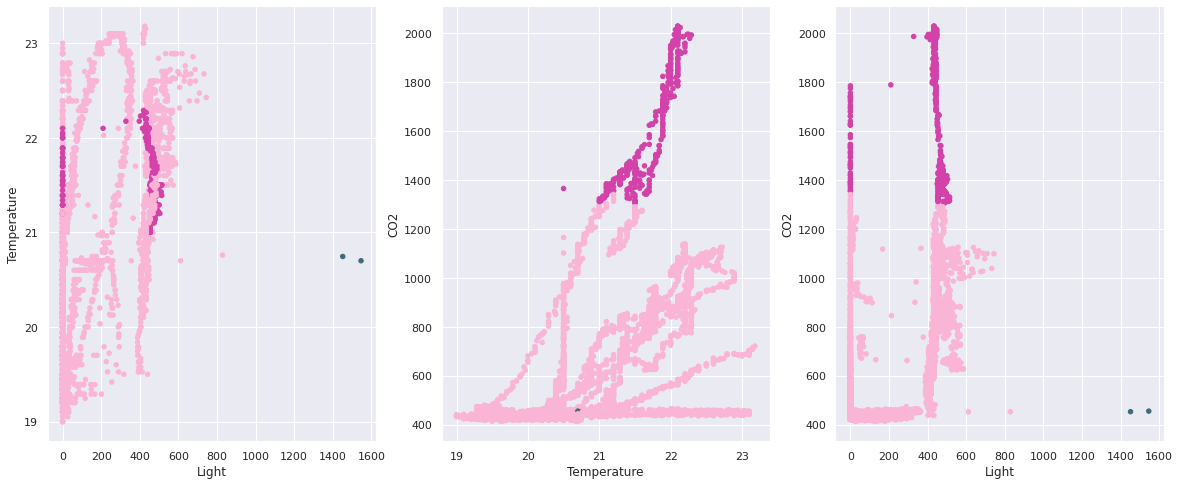

In [ ]:
from random import randint

colors = []

for i in range(3):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
    
vectorizer = np.vectorize (lambda x: colors [x% len (colors)])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))
ax1.scatter(x['Light'], x['Temperature'],c=vectorizer(hc.labels_), s=20)
ax1.set_xlabel("Light")
ax1.set_ylabel("Temperature")


ax2.scatter(x['Temperature'], x['CO2'],c=vectorizer(hc.labels_), s=20)
ax2.set_xlabel("Temperature")
ax2.set_ylabel("CO2")


ax3.scatter(x['Light'], x['CO2'], c=vectorizer(hc.labels_), s=20)
ax3.set_xlabel("Light")
ax3.set_ylabel("CO2")

In [ ]:
for i in range(3):
  l = len(tr[tr.complete_cluster==i])
  l_occ = len(tr[(tr.complete_cluster==i) & (tr.Occupancy==1)])
  print("Cluster %d:" %i)
  print("Numero elementi: %d" %l)
  print("Elementi con Occupancy=1: %d  --> %d%%" %(l_occ, (l_occ/l)*100))
  print()

Cluster 0:
Numero elementi: 7743
Elementi con Occupancy=1: 1382  --> 17%

Cluster 1:
Numero elementi: 398
Elementi con Occupancy=1: 347  --> 87%

Cluster 2:
Numero elementi: 2
Elementi con Occupancy=1: 0  --> 0%

